The durations are indicative and obviously depend on each person. If you see that you can't finish an exercise in time, don't hesitate to move to the next exercise.

If you don't have time to finish everything, you can start again this weekend or next week. You will simply indicate in the comments the scripts you have completed afterwards.

# Part 1 - API - around 1h

The following dataset lists a selection of the best restaurants in Paris, at very affordable prices (less than 15 euros per menu on average).
You will use this  [API](https://adresse.data.gouv.fr/api-doc/adresse), to retrieve coordinate points (lon, lat) for each restaurants.



In [1]:
import pandas as pd

food_paris = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/food.csv").drop(columns = "Unnamed: 0")

In [2]:
food_paris.head()

,nom,adresse,code postal
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris
2,Pizz'Aria,55 Rue Montmartre,75002 Paris
3,M La Vie,85 Rue Montmartre,75002 Paris
4,Road Trip,36 Rue Poissonnière,75002 Paris


In [ ]:
# Part 1 - API - around 1h
# exemple :
import requests
import pprint
link = "https://api-adresse.data.gouv.fr/search/?q=8+bd+du+port&postcode=44380"
header ={"User_Agent":("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36 Edg/124.0.0.0") }
r = requests.get(link, headers=header).json()
r


In [6]:
import re

link_main = 'https://api-adresse.data.gouv.fr/search/?q='
adresse_postale = '12 Rue de Richelieu'
ville = '75001 Paris'
p_code = '&postcode='
post_code = ville.split(" ")[0]

link = link_main + adresse_postale.replace(" ","+") + p_code + post_code

print(link)

https://api-adresse.data.gouv.fr/search/?q=12+Rue+de+Richelieu&postcode=75001


In [8]:
for x in range(len(food_paris)):
    adresse_postale = food_paris['adresse'][x]
    ville = food_paris['code postal'][x]
    p_code = '&postcode='
    post_code = ville.split(" ")[0]
    link = link_main + adresse_postale.replace(" ","+") + p_code + post_code
    r = requests.get(link, headers=header).json()
    food_paris.loc[x,'lon'] = r['features'][0]['geometry']['coordinates'][0]
    food_paris.loc[x,'lat'] = r['features'][0]['geometry']['coordinates'][1]
    

In [9]:
food_paris

,nom,adresse,code postal,lon,lat
0,Kodawari Tsukiji,12 Rue de Richelieu,75001 Paris,2.336258,48.864374
1,Café Lai’Tcha,7 Rue du Jour,75001 Paris,2.344247,48.863550
2,Pizz'Aria,55 Rue Montmartre,75002 Paris,2.344484,48.865983
3,M La Vie,85 Rue Montmartre,75002 Paris,2.343757,48.867596
4,Road Trip,36 Rue Poissonnière,75002 Paris,2.347940,48.869951
5,Rolls,29 Rue des Jeuneurs,75002 Paris,2.344421,48.869541
6,Qasti Shawarma,214 Rue Saint-Martin,75003 Paris,2.352870,48.863752
7,The Brooklyn Pizzeria,33 Bd Beaumarchais,75003 Paris,2.368186,48.856000
8,La Baguette du relais,10 Rue des Archives,75004 Paris,2.354532,48.857587
9,Olive & Thym,60 Rue Quincampoix,75004 Paris,2.350820,48.861576


# Folium

You will now project these restaurants on a map, using the `Folium` library.

In [16]:
import folium

point = [float(food_paris['lat'][0]), float(food_paris['lon'][0])]

m = folium.Map(location=point, zoom_start=12)

for ind, val in enumerate(food_paris["adresse"]):
      point = [float(food_paris['lat'][ind]), float(food_paris['lon'][ind])]
      folium.Marker(
          location=point,
          popup= food_paris['nom'][ind]
          ).add_to(m)
      
m

# Sorting and grouping

You can now build a descending ranking,  considering the number of restaurants per district.

In [44]:
food_paris['arrondissement'] = food_paris['code postal'].apply(lambda x: x.split(" ")[0])
food_paris['arrondissement'] = food_paris['arrondissement'].apply(lambda x: x.split("50")[1])
food_paris_v1 = food_paris['arrondissement']
food_paris_v1 = food_paris_v1.groupby(food_paris['arrondissement']).count().sort_values(ascending=False)
food_paris_v1
                                                                

arrondissement
02    5
09    4
10    4
11    3
01    2
03    2
04    2
06    2
08    2
07    1
14    1
17    1
Name: arrondissement, dtype: int64

# Part 2 - Data exploration & processing - Python & Pandas - around 30 min

Run the code below. You will get a DataFrame with 10 000 restaurant comments.
- date: the date of the comment
- stars: the rating (from 1 to 5)
- text: the text of the review
- useful: the number of users who indicated this comment as "useful"
- sentiment: the word "good" or "bad" depending on the stars rating

The goal of these parts will be to explore this dataset, then to propose a prediction model of positive rating according to the other features.

Start by checking that there are no missing values.

In [45]:
import pandas as pd
df_restaurants = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/restaurant.zip", index_col='Unnamed: 0').loc[:,["date", "stars", "text", "useful"]]
df_restaurants["sentiment"] = df_restaurants["stars"].apply(lambda x: "bad" if x <=3 else "good")
df_restaurants

,date,stars,text,useful,sentiment
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good
1,2011-07-27,5,I have no idea why some people give bad review...,0,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good
...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad


In [46]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       10000 non-null  object
 1   stars      10000 non-null  int64 
 2   text       10000 non-null  object
 3   useful     10000 non-null  int64 
 4   sentiment  10000 non-null  object
dtypes: int64(2), object(3)
memory usage: 468.8+ KB


## Column "text"

Use **apply** to create a new column `len_text`, indicating the length (number of characters) of each comment.

Draw a histogram and a boxplot to represent the distribution of this "len_text" column. Are the values well distributed? Are most comments long or short?

In [47]:
df_restaurants['len_text'] = df_restaurants['text'].apply(lambda x: len(x))
df_restaurants

,date,stars,text,useful,sentiment,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,good,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,good,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,good,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,good,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,good,469
...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,2,bad,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,0,good,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,0,good,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,0,bad,880


In [71]:
df_restaurants['sentiment'].value_counts()

sentiment
good    6863
bad     3137
Name: count, dtype: int64

C:\Users\aurel\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='len_text', ylabel='Count'>

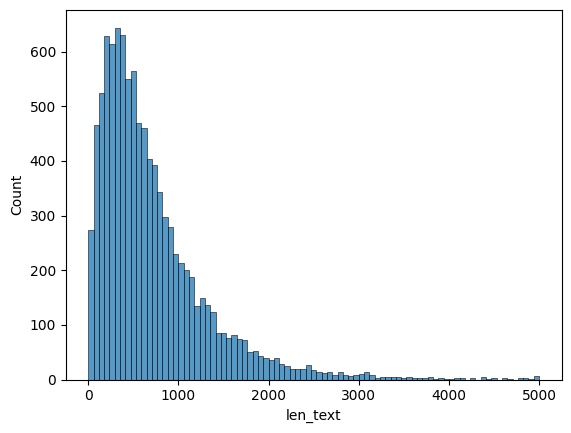

In [48]:
import seaborn as sns

sns.histplot(data=df_restaurants, x="len_text")

<Axes: xlabel='len_text'>

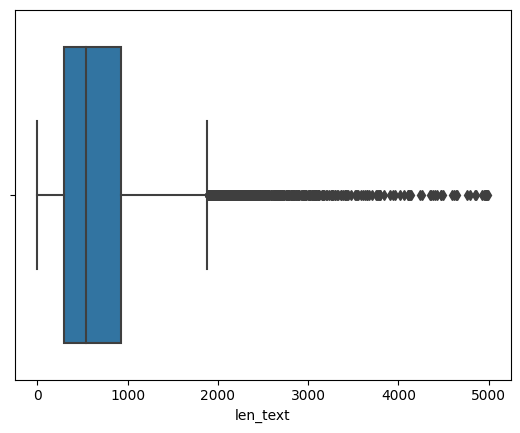

In [49]:
sns.boxplot(data=df_restaurants, x="len_text")

les valeurs se concentrent entre 400 et 800, il y a peu de tres long commentraire !    

## Column "stars"

- Draw a scatterplot to compare the `useful` column and the `stars` column. Do you think there is a correlation? Please compute the correlation coefficient.

- Ditto between `len_text` and `useful`.

- Please comment and interpret the results.



<Axes: xlabel='useful', ylabel='stars'>

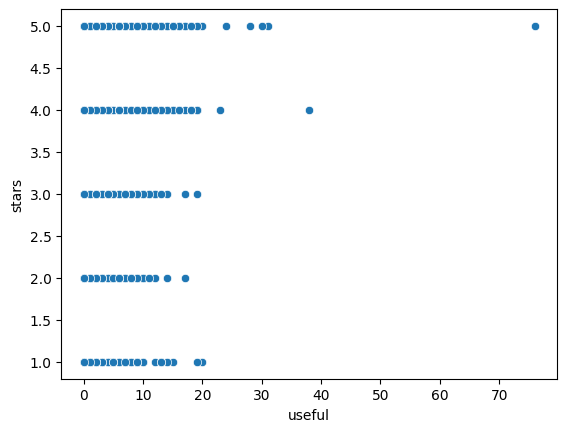

In [50]:
sns.scatterplot(data=df_restaurants, x="useful", y="stars")

In [52]:
df_restaurants['useful'].corr(df_restaurants['stars'])

-0.02347895512769386

<Axes: xlabel='len_text', ylabel='useful'>

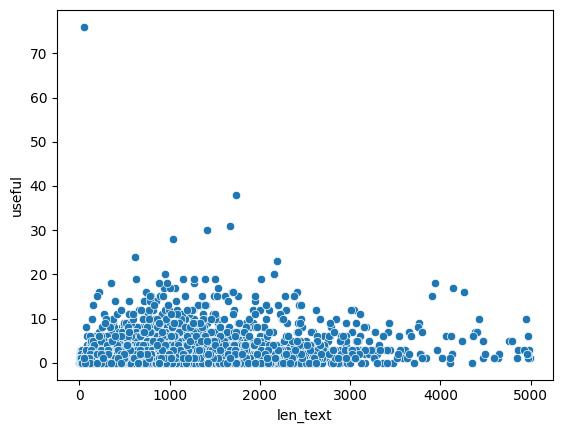

In [51]:
sns.scatterplot(data=df_restaurants, x="len_text", y="useful")

In [53]:
df_restaurants['len_text'].corr(df_restaurants['useful'])

0.29397538215526114

les coefficients de correlation sont faibles, il n'y a pas de correlation entre les deux variables.

# Part 3 : NLP - Sentiment analysis classification - 2h

Define `X` which will contain only the `text` column. And `y` will be the `sentiment` column.

In [54]:
X = df_restaurants['text']
y = df_restaurants['sentiment']

## Create a function to clean up stopwords and punctuation

You can call your function `func_clean`.
Your function must take a `str` as a single parameter, and return a `str`.

For example:

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [55]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\aurel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [58]:
import spacy
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
nlp = spacy.load('en_core_web_sm')

def func_clean(text):
    text_1 = tokenizer.tokenize(text.lower())
    tokens_clean = []
    for words in text_1:
        if words not in nltk.corpus.stopwords.words("english"):
            tokens_clean.append(words)
    new_text = " ".join(tokens_clean) 
    list_mots = []
    for mot in nlp(new_text):
        list_mots.append(mot.lemma_)
    text_clean = " ".join(list_mots) 
    return text_clean

func_clean("Hello, how are you? Fine, thank you.")

'hello fine thank'

## Apply this function

Apply this function to `X` and store the result in `X_clean`.

In [59]:
X_clean = X.apply(lambda x: func_clean(x))

## Train test split

Split your `X_clean` and `y` data with a train test split, and the same `random_state = 32`.



In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X_clean, y, random_state=32, train_size=0.75)


## TfidfVectorizer

- Train `TfidfVectorizer` on `X_train`.
- Transform `X_train` with your vectorizer and store the result in `X_train_vecto`.
- Transform `X_test` with your vectorizer and store the result in `X_test_vecto`.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vecto = vectorizer.fit_transform(X_train)

X_test_vecto = vectorizer.transform(X_test)


## Logistic regression

Train a logistic regression on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting?

Also display a confusion matrix for the test set. How many "bad" comments are correctly predicted?

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_vecto, y_train)

model.score(X_train_vecto, y_train), model.score(X_test_vecto, y_test)




(0.8890666666666667, 0.8364)

In [68]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_vecto)

test_conf_matrix = confusion_matrix(y_test, y_pred)

test_conf_matrix

array([[ 433,  321],
       [  88, 1658]], dtype=int64)

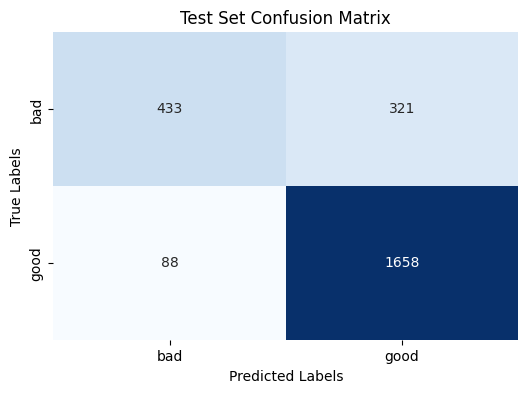

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["bad", "good"], yticklabels=["bad", "good"])
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

433 de "mauvais" commentaires sont correctement prédits

## Decision tree
Train a decision tree on `X_train_vecto` and `y_train`.

Please compare the accuracy scores of the training and test sets. Is there any overfitting? Are the scores better than previously?

In [73]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

model_tree.fit(X_train_vecto, y_train)

model_tree.score(X_train_vecto, y_train), model_tree.score(X_test_vecto, y_test)




(1.0, 0.6884)

<Axes: >

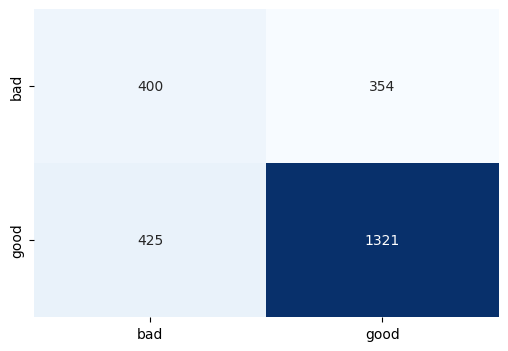

In [75]:
y_pred_tree = model_tree.predict(X_test_vecto)

test_conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)


import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.heatmap(test_conf_matrix_tree, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["bad", "good"], yticklabels=["bad", "good"])

400 de "mauvais" commentaires sont correctement prédits et 1321 de "bon" commentaires sont correctement prédits ! ce qui est moins bon que le modèle précédent !

## Bonus question (optional)

Use `GridsearchCV` to find the best parameters.
Make sure you don't do more than 1000 different iterations (i.e. combinations).
Otherwise, the time may seem very long...





In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {   
   'max_depth': range(1,50)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5) 

grid.fit(X_train_vecto, y_train)




GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 50)})

In [152]:
print("best score:",grid.best_score_)
print("best parameters:",grid.best_params_)

best score: 0.7247999999999999
best parameters: {'max_depth': 13}


In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'criterion': ['gini', 'entropy']}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5) 

grid.fit(X_train_vecto, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [154]:
print("best score:",grid.best_score_)
print("best parameters:",grid.best_params_)

best score: 0.7061333333333333
best parameters: {'criterion': 'gini'}


In [155]:
param_grid = {'splitter': ['best', 'random']}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5) 

grid.fit(X_train_vecto, y_train)
 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'splitter': ['best', 'random']})

In [156]:
print("best score:",grid.best_score_)
print("best parameters:",grid.best_params_)

best score: 0.7060000000000001
best parameters: {'splitter': 'random'}


In [160]:
param_grid = {'splitter': ['random'],
              'criterion': ['gini'],
              'max_depth': range(1,20)
              }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5) 

grid.fit(X_train_vecto, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20),
                         'splitter': ['random']})

In [161]:
print("best score:",grid.best_score_)
print("best parameters:",grid.best_params_)

best score: 0.7243999999999999
best parameters: {'criterion': 'gini', 'max_depth': 14, 'splitter': 'random'}


# Optionnel : Algorithme `JSON` et manipulation.
This is a json file containing several keys.
Each key has a value, which could potentially be another key, containing another value, which could potentially be another key etc...

In [92]:
food = {
  "clé1": {
    "fruit1": "pomme",
    "légume4": "brocoli"
  },
  "clé2": {
    "légume1": "carotte",
    "fruit5": "banane",
    "légume3": "courgette"
  },
  "clé3": {
    "niveau1": {
      "niveau2": {
        "fruit3": "orange",
        "légume5": "aubergine",
        "fruit5": "mangue"
      }
    }
  },
  "clé4": {
    "niveau1": {
      "niveau2": {
        "niveau3": {
          "fruit6": "raisin",
          "fruit7": "fraise",
          "légume4": "poivron",
          "fruit2": "pastèque"
        }
      }
    }
  }
}


Problem:
Fruits and vegetables have been misplaced in this json file. The goal is to retrieve each of the fruits and vegetables, and assign them to two corresponding lists: `fruits_list` & `vegetables_list`.

Expected solution:

`fruits_list` = `['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']`

`vegetables_list` = `['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']`



In [135]:
data_1 = pd.json_normalize(food)
data_1

,clé1.fruit1,clé1.légume4,clé2.légume1,clé2.fruit5,clé2.légume3,clé3.niveau1.niveau2.fruit3,clé3.niveau1.niveau2.légume5,clé3.niveau1.niveau2.fruit5,clé4.niveau1.niveau2.niveau3.fruit6,clé4.niveau1.niveau2.niveau3.fruit7,clé4.niveau1.niveau2.niveau3.légume4,clé4.niveau1.niveau2.niveau3.fruit2
0,pomme,brocoli,carotte,banane,courgette,orange,aubergine,mangue,raisin,fraise,poivron,pastèque


In [138]:
fruits_list = []
vegetables_list = []

for  val in data_1.columns:
    val_1 = val.split(".")[-1]
    val_2 = val_1.split("t")[0]
    if val_2 == ('frui'):
        fruits_list.append(data_1[val].values[0])
    else:
        vegetables_list.append(data_1[val].values[0])

In [139]:
fruits_list

['pomme', 'banane', 'orange', 'mangue', 'raisin', 'fraise', 'pastèque']

In [140]:
vegetables_list

['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']

Next, you'll create a new dictionary, which will simply contain two keys: `fruits` & `vegetables`. Each key will have the value of the list of fruits and the list of vegetables. That way, everything will be in order.

Expected solution:
`food_dict` = `{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}`

In [142]:
food_dict = {'fruits' : fruits_list,'legumes': vegetables_list}

In [143]:
food_dict

{'fruits': ['pomme',
  'banane',
  'orange',
  'mangue',
  'raisin',
  'fraise',
  'pastèque'],
 'legumes': ['brocoli', 'carotte', 'courgette', 'aubergine', 'poivron']}